In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

In [36]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3)

In [37]:
X

array([[ 8.3780508 ,  5.75195862],
       [-9.06599697, -0.51179557],
       [ 9.21807778,  7.28133573],
       ...,
       [10.80123547, -5.52170115],
       [10.1443113 , -4.97208765],
       [ 9.73532708,  6.21956157]])

In [38]:
y

array([0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1,
       2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2,
       0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0,
       1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 1,
       0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2,

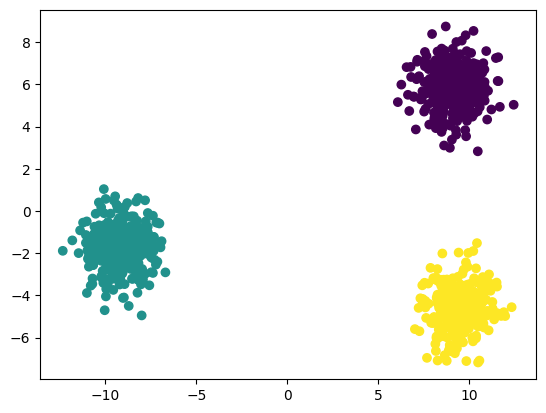

In [39]:
plt.scatter(X[:,0],X[:,1],c=y)

In [40]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [42]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit(X_test)

In [43]:
from sklearn.cluster import KMeans

In [45]:
##Elbo method to select the k values
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [46]:
wcss

[1340.0000000000014,
 632.615618168111,
 41.62684723147869,
 35.5000607379648,
 28.859256150888893,
 26.901037762624057,
 23.345239550372426,
 16.61350102380488,
 15.979628895336852,
 14.318404056915035]

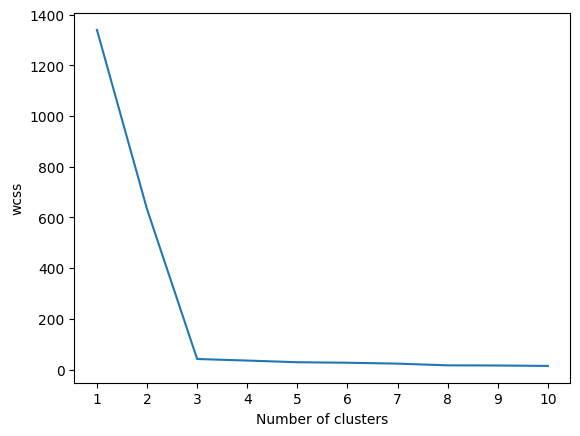

In [47]:
## plot elbo curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel('wcss')
plt.show()

In [49]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [52]:
kmeans.fit_predict(X_train_scaled)
y_pred=kmeans.predict(X_test)

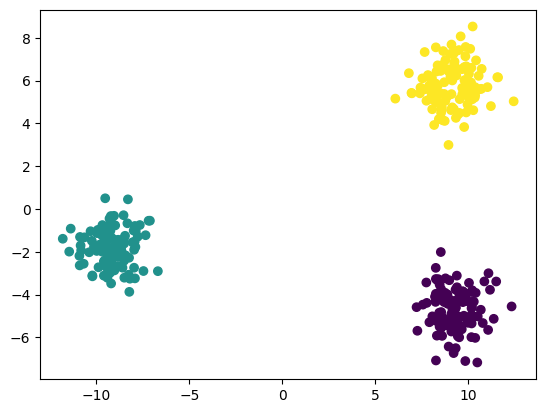

In [53]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## validating k value
## Kneelocator
## Silhoutee scoring

In [60]:
pip install kneed

  Using cached kneed-0.8.5-py3-none-any.whl.metadata (5.5 kB)
Using cached kneed-0.8.5-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [67]:
from kneed import KneeLocator
KneeLocator(range(1,11),wcss,curve='concave',direction='decreasing')

In [ ]:
k1=KneeLocator(range(1,11),wcss,curve='concave',direction='decreasing')

In [69]:
k1.elbow

np.int64(10)

In [70]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [72]:
silhouette_coefficent=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficent.append(score)

In [73]:
silhouette_coefficent

[np.float64(0.6180980282115637),
 np.float64(0.8631119923317196),
 np.float64(0.7091641928571936),
 np.float64(0.5570507748969843),
 np.float64(0.39557869109920135),
 np.float64(0.5305209607708868),
 np.float64(0.3596867215893308),
 np.float64(0.37139602495534146),
 np.float64(0.37542794811020797)]

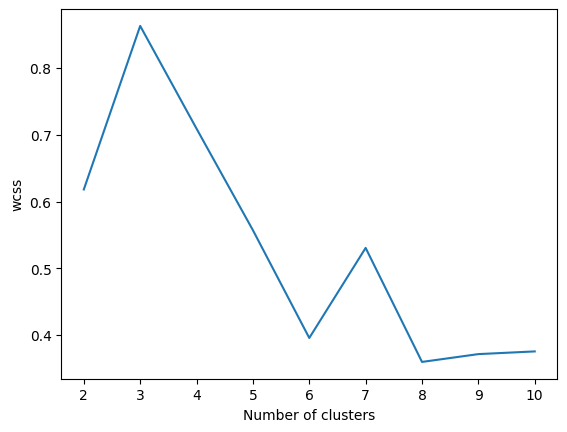

In [75]:
## plotting silhouette curve
plt.plot(range(2,11),silhouette_coefficent)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel('wcss')
plt.show()